<a href="https://colab.research.google.com/github/denXio06/intro-to-ai/blob/main/CMSC210_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [ ]:
import torch
from torch import nn
from torch.optim import Adam

In [ ]:
df = pd.read_csv("/content/CMSC210-A3-data-2.csv")

df.tail()

,Age,Total years of Working Experience,Total Estimate Current Monthly Income,Total income-generating streams before the pandemic,Total income-generating streams after the pandemic,"TODAY (or post-pandemic), how do you prioritize the below category in your budget allocation? [Emergency Fund]"
43,32,10,145000,4,4,Extremely High
44,29,9,60000,3,3,Extremely High
45,42,23,120000,4,4,Extremely High
46,35,15,130000,4,4,High
47,31,8,120000,2,4,High


In [ ]:
# target attribute : how does someone prioritize emergency fund after the pandemic

priority_mapping = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2,
    'Extremely High' : 3
}

df['TODAY (or post-pandemic), how do you prioritize the below category in your budget allocation? [Emergency Fund]'] = df.apply(lambda x: priority_mapping.get(x['TODAY (or post-pandemic), how do you prioritize the below category in your budget allocation? [Emergency Fund]']), axis=1)

df.tail()

,Age,Total years of Working Experience,Total Estimate Current Monthly Income,Total income-generating streams before the pandemic,Total income-generating streams after the pandemic,"TODAY (or post-pandemic), how do you prioritize the below category in your budget allocation? [Emergency Fund]"
43,32,10,145000,4,4,3
44,29,9,60000,3,3,3
45,42,23,120000,4,4,3
46,35,15,130000,4,4,2
47,31,8,120000,2,4,2


In [ ]:
X = df.drop('TODAY (or post-pandemic), how do you prioritize the below category in your budget allocation? [Emergency Fund]', axis=1)
y = df['TODAY (or post-pandemic), how do you prioritize the below category in your budget allocation? [Emergency Fund]']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
y_train

44    3
29    3
27    2
1     0
24    2
33    2
38    3
19    0
36    3
10    1
4     1
6     3
3     3
39    3
5     2
32    0
28    2
20    3
26    2
37    3
21    1
41    3
31    2
34    2
7     3
47    2
11    2
18    1
22    2
8     3
45    3
15    3
40    2
Name: TODAY (or post-pandemic), how do you prioritize the below category in your budget allocation? [Emergency Fund], dtype: int64

In [ ]:
y_test

23    2
12    2
42    3
16    3
35    2
43    3
46    2
13    0
14    1
0     3
2     2
9     1
17    2
30    2
25    3
Name: TODAY (or post-pandemic), how do you prioritize the below category in your budget allocation? [Emergency Fund], dtype: int64

In [ ]:
# Normalize values
X_train = Normalizer().fit_transform(X_train.values)
X_test = Normalizer().fit_transform(X_test.values)

# Convert data to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [ ]:
# model class
class Model(nn.Module):
    def __init__(self, n_input, n_hidden_layer_1, n_output):
        super().__init__()
        self.fc1 = nn.Linear(n_input, n_hidden_layer_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_layer_1, n_output)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

# parameters
number_of_features = 5
number_of_classes = 4
number_of_neurons_on_hidden_layer = 10 # more neurons may lead to overfit

# instantiate model
model = Model(number_of_features, number_of_neurons_on_hidden_layer, number_of_classes)

# hyperparameters
model_optimizer = Adam(model.parameters(), lr=0.001)
model_loss_fn = nn.CrossEntropyLoss()
number_of_epochs = 1000000  # more epochs until converge

# collect the losses to plot afterwards
losses = []

# training the model
for epoch in range(number_of_epochs):
    y_pred = model(X_train)
    loss = model_loss_fn(y_pred, y_train)
    losses.append(loss.detach().numpy())
    model_optimizer.zero_grad()
    loss.backward()
    model_optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, loss: {loss}')

Epoch: 0, loss: 1.3910480737686157
Epoch: 1000, loss: 1.2053096294403076
Epoch: 2000, loss: 1.2051929235458374
Epoch: 3000, loss: 1.2050246000289917
Epoch: 4000, loss: 1.2046047449111938
Epoch: 5000, loss: 1.2032045125961304
Epoch: 6000, loss: 1.1996026039123535
Epoch: 7000, loss: 1.1930862665176392
Epoch: 8000, loss: 1.183975338935852
Epoch: 9000, loss: 1.1731849908828735
Epoch: 10000, loss: 1.1615809202194214
Epoch: 11000, loss: 1.1497821807861328
Epoch: 12000, loss: 1.1382066011428833
Epoch: 13000, loss: 1.1271599531173706
Epoch: 14000, loss: 1.1168769598007202
Epoch: 15000, loss: 1.107500433921814
Epoch: 16000, loss: 1.0991065502166748
Epoch: 17000, loss: 1.0916409492492676
Epoch: 18000, loss: 1.0851562023162842
Epoch: 19000, loss: 1.0795495510101318
Epoch: 20000, loss: 1.0747674703598022
Epoch: 21000, loss: 1.0707038640975952
Epoch: 22000, loss: 1.067186713218689
Epoch: 23000, loss: 1.0638513565063477
Epoch: 24000, loss: 1.0604254007339478
Epoch: 25000, loss: 1.0567439794540405
Ep

Text(0.5, 0, 'Epoch')

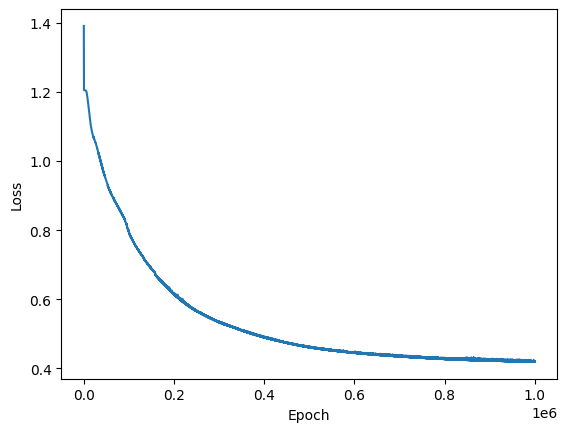

In [ ]:
# Plot the loss vs epoch
plt.plot(range(number_of_epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
# Evaluate model using X_test
correct_predictions = 0

with torch.no_grad():
    for index, data in enumerate(X_test):
        y_eval = model(data)

        actual = y_test[index]
        predicted = y_eval.argmax().item()

        print(f'{str(y_eval)} Actual: {actual} Predicted: {predicted}')
        if actual == predicted:
            correct_predictions += 1

    accuracy = correct_predictions/X_test.size()[0]

    print(f'Accuracy: {accuracy*100}')

tensor([-26.1552,  20.7431,  -0.6534,   1.7158]) Actual: 2 Predicted: 1
tensor([  6.0088, -22.4814,   1.3706,   0.0983]) Actual: 2 Predicted: 0
tensor([  7.0137, -32.3251,  10.6282,   3.7078]) Actual: 3 Predicted: 2
tensor([-11.7958, -10.2162,  -7.9657,  -6.1938]) Actual: 3 Predicted: 3
tensor([ -0.7889, -32.1262,   5.2705,   2.2817]) Actual: 2 Predicted: 2
tensor([-15.5499,  -5.0721,  -9.6870,  -7.3209]) Actual: 3 Predicted: 1
tensor([ -9.7921, -18.8872,  -4.2657,  -2.3004]) Actual: 2 Predicted: 3
tensor([-21.1405,  -1.1107, -12.0500,  -8.3416]) Actual: 0 Predicted: 1
tensor([ 18.6812, -48.9397,  11.9670,   5.8325]) Actual: 1 Predicted: 0
tensor([-12.3287, -10.9115,  -8.0760,  -5.8616]) Actual: 3 Predicted: 3
tensor([  9.9062, -54.5720,  13.3605,  11.6048]) Actual: 2 Predicted: 2
tensor([-14.2241,  -8.4467,  -9.1255,  -6.7544]) Actual: 1 Predicted: 3
tensor([ -0.7125, -22.7243,   0.4295,  -2.1225]) Actual: 2 Predicted: 2
tensor([ -4.3590, -30.6712,   1.7926,   2.2058]) Actual: 2 Predi

In [ ]:
# Evaluate model using random created data
age = 30
total_years_of_experience = 9
total_estimate_income = 40000
total_streams_before_pandemic = 1
total_streams_after_pandemic = 9

sample_data_arr = np.array([age, total_years_of_experience, total_estimate_income, total_streams_before_pandemic, total_streams_after_pandemic])

sample_data = Normalizer().fit_transform([sample_data_arr])
sample_data = torch.FloatTensor(sample_data)
with torch.no_grad():
    y_eval_test = model(sample_data)

    y_eval_predicted = y_eval_test.argmax().item()

    print(f'Predicted value: {y_eval_predicted}')

Predicted value: 3
